In [37]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
stops = set(stopwords.words('russian'))

In [38]:
f = open('data.txt', 'r')

In [39]:
data = np.array(f.readlines())

In [40]:
# Количество строк
data.size

2128

In [56]:
# Количество слов
words1 = []
for i in data:
    for j in tokenizer.tokenize(i.lower()):
        words1.append(j)
len(words1)

45078

In [57]:
def len_word(a):
    return len(a)
vec_len = np.vectorize(len_word)
ln = vec_len(np.array(words1))

In [60]:
# число символов без пробельных
ln.sum()

241149

In [64]:
# число символов с пробельными
ln1 = vec_len(np.array(data))
ln1.sum()

298375

In [41]:
words = []
for i in data:
    for j in tokenizer.tokenize(i.lower()):
        if j not in stops:
            words.append(j)

In [42]:
dt = pd.Series(words).value_counts()

In [46]:
dt[:20]

это          208
марсиане      94
марсиан       92
брат          87
около         76
увидел        72
человек       69
люди          67
сказал        66
снова         63
людей         61
несколько     60
очень         56
мог           56
ночь          55
день          52
нам           51
время         49
очевидно      46
среди         46
dtype: int64

In [53]:
dict(dt[:20])

{'это': 208,
 'марсиане': 94,
 'марсиан': 92,
 'брат': 87,
 'около': 76,
 'увидел': 72,
 'человек': 69,
 'люди': 67,
 'сказал': 66,
 'снова': 63,
 'людей': 61,
 'несколько': 60,
 'очень': 56,
 'мог': 56,
 'ночь': 55,
 'день': 52,
 'нам': 51,
 'время': 49,
 'очевидно': 46,
 'среди': 46}

In [49]:
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

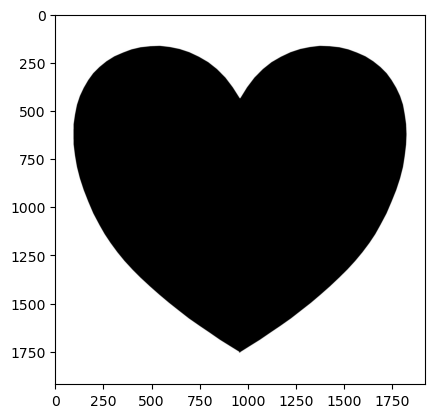

In [52]:
mask = np.array(Image.open("imgg.jpg"))
plt.imshow(mask)

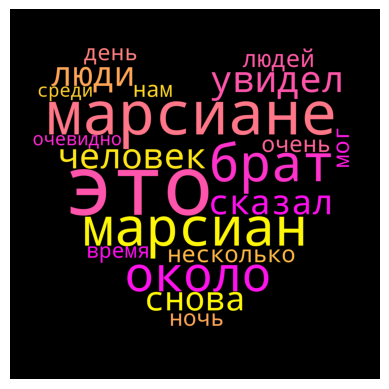

In [55]:
wordcloud = WordCloud(width=1700,
                        height=1150,
                        background_color='black',
                        min_font_size=3,
                        colormap="spring", mask=mask)

wordcloud.generate_from_frequencies(frequencies=dict(dt[:20]))
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()